##EJERCICIO
Predicción de reseña de películas positiva o negativa haciendo uso de modelos diferentes

*   Carga
*   Limpieza
*   Vectorización
*   Modelo
*   Prueba de accuracy 0.82

In [ ]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import string
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Entramos a google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Carga de archivo

In [ ]:
# Cargamos el conjunto de datos
df = pd.read_csv('/content/drive/MyDrive/Diplomado IA/IMDB Dataset.csv')

# Ver las primeras filas del dataframe
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


## Limpieza de datos

In [ ]:
def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()  # Elimina HTML
    text = re.sub(r'[^\w\s]', '', text)  # Elimina puntuación
    text = text.lower()  # Convierte a minúsculas
    return text

df['review'] = df['review'].apply(clean_text)
print("Datos después de la limpieza de texto:")
print(df.head())

<ipython-input-4-cbcc08739fff>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()  # Elimina HTML


Datos después de la limpieza de texto:
                                              review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production the filming tech...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically theres a family where a little boy j...  negative
4  petter matteis love in the time of money is a ...  positive


In [ ]:
# Exploracion de datos
df.head(10)

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
5,probably my alltime favorite movie a story of ...,positive
6,i sure would like to see a resurrection of a u...,positive
7,this show was an amazing fresh innovative ide...,negative
8,encouraged by the positive comments about this...,negative
9,if you like original gut wrenching laughter yo...,positive


## Vectorizacion

In [ ]:
# Inicializar el vectorizador TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)

# Ajustar y transformar los datos de entrenamiento
X = vectorizer.fit_transform(df['review'])

# Las etiquetas
y = df['sentiment']

## Modelo

Puntajes de Validación Cruzada: [0.88571429 0.88414286 0.88314286 0.88257143 0.88585714]
Puntaje Promedio de Validación Cruzada: 0.8842857142857143


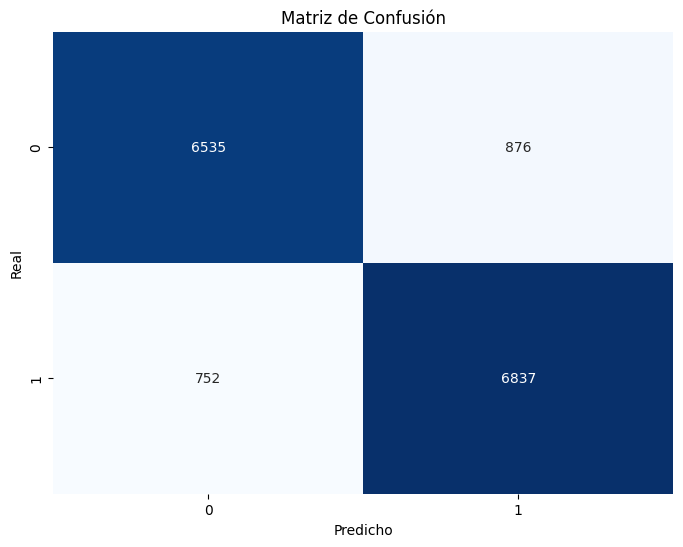

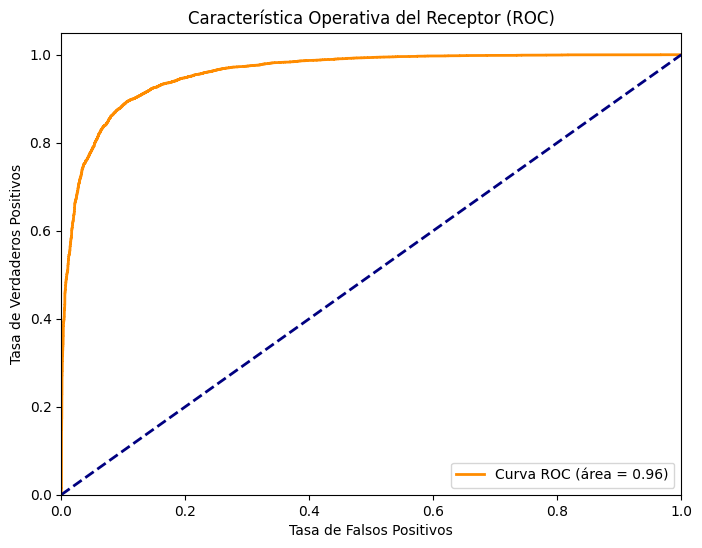

Exactitud: 0.8914666666666666

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      7411
           1       0.89      0.90      0.89      7589

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000


Matriz de Confusión:
 [[6535  876]
 [ 752 6837]]


In [ ]:
# Codificar la variable categórica 'sentiment'
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

# Separa las variables independientes (reseñas) y la variable objetivo (sentimiento)
X = df['review']  # Las reseñas son la característica principal
y = df['sentiment']  # Las etiquetas de sentimiento son la variable objetivo

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocesamiento de texto: vectorización TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Entrenamiento del modelo de Regresión Logística
modelo = LogisticRegression()
modelo.fit(X_train_tfidf, y_train)

# Validación cruzada
puntajes_validacion_cruzada = cross_val_score(modelo, X_train_tfidf, y_train, cv=5)
print("Puntajes de Validación Cruzada:", puntajes_validacion_cruzada)
print("Puntaje Promedio de Validación Cruzada:", np.mean(puntajes_validacion_cruzada))

# Predicción
y_prediccion = modelo.predict(X_test_tfidf)

# Evaluación del modelo
exactitud = accuracy_score(y_test, y_prediccion)
informe_clasificacion = classification_report(y_test, y_prediccion)
matriz_confusion = confusion_matrix(y_test, y_prediccion)

# Gráfica de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# Gráfica de la curva ROC
probabilidad_y = modelo.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, umbrales = roc_curve(y_test, probabilidad_y)
area_bajo_curva_roc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % area_bajo_curva_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Característica Operativa del Receptor (ROC)')
plt.legend(loc='lower right')
plt.show()

# Imprimir las métricas de evaluación
print("Exactitud:", exactitud)
print("\nInforme de Clasificación:\n", informe_clasificacion)
print("\nMatriz de Confusión:\n", matriz_confusion)

## Prueba occuracy



In [ ]:
# Calcular la precisión del modelo
precision_modelo = accuracy_score(y_test, y_prediccion)

# Realizar la prueba de si la precisión es mayor que 0.82
if precision_modelo > 0.82:
    print("El modelo cumple con el requisito de precisión (> 0.82).")
else:
    print("El modelo no cumple con el requisito de precisión (> 0.82).")

El modelo cumple con el requisito de precisión (> 0.82).


## PICKLE

In [ ]:
import pickle

In [ ]:
# Guardar el modelo y el vectorizador
with open('logistic_model.pkl', 'wb') as model_file:
    pickle.dump(modelo, model_file)

with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)

## Uso de Streamlit

In [ ]:
! pip install streamlit

In [ ]:
pip install streamlit -q

In [ ]:
pip install streamlit-lottie

In [ ]:
%%writefile app.py

import streamlit as st
import numpy as np
import pickle
from bs4 import BeautifulSoup
import re

# Cargar el modelo y el vectorizador TF-IDF
with open('logistic_model.pkl', 'rb') as model_file:
    modelo = pickle.load(model_file)

with open('tfidf_vectorizer.pkl', 'rb') as vectorizer_file:
    tfidf_vectorizer = pickle.load(vectorizer_file)

st.title("Predict Reviews' Sentiment")

# Entrada de la reseña
review = st.text_input("Ingrese la reseña:")

if st.button("Predicción"):
    # Preprocesar y vectorizar la reseña
    review_cleaned = BeautifulSoup(review, "html.parser").get_text()
    review_cleaned = re.sub(r'[^\w\s]', '', review_cleaned)
    review_cleaned = review_cleaned.lower()
    review_vectorized = tfidf_vectorizer.transform([review_cleaned])

    # Predicción
    pred = modelo.predict(review_vectorized)[0]

    if pred == 0:
        st.write("La reseña es Negativa")
    else:
        st.write("La reseña es Positiva")

Overwriting app.py


In [ ]:
! wget -q -O - ipv4.icanhazip.com

130.211.245.195


In [ ]:
## Codigo para correr la pagina
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://130.211.245.195:8501

npx: installed 22 in 1.968s
your url is: https://stale-clowns-sleep.loca.lt
  Stopping...
^C
